In [1]:
#importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
#reading the train csv file
train_df = pd.read_csv("../data/train.csv")

In [3]:
#checking the shape of dataframe
train_df.shape

(614, 13)

In [4]:
#quick info about the dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#top 5 records
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
def check_null(df):
    '''
    Function returns % of null values in each column
    
    Args:
        df(Pandas DataFrame)
        
    Returns:
        Pandas Series: columns as index and the percentage of null values as value
    '''
    nulls = (df.isnull().sum())/len(df)
    return 100*nulls.sort_values(ascending=False)

In [7]:
#null values in each column
check_null(train_df)

Credit_History       8.143322
Self_Employed        5.211726
LoanAmount           3.583062
Dependents           2.442997
Loan_Amount_Term     2.280130
Gender               2.117264
Married              0.488599
Loan_ID              0.000000
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

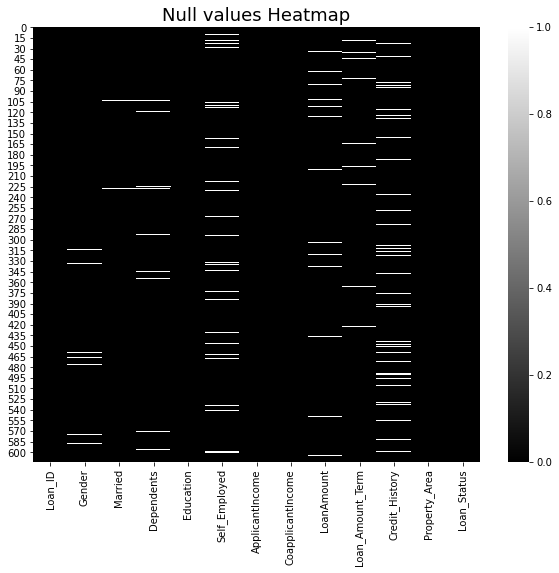

In [8]:
#plotting heatmap for null values
plt.figure(figsize=(10,8))
plt.title("Null values Heatmap", fontdict={'fontsize':18})
sb.heatmap(train_df.isnull(), cmap='gray')
plt.show()

### Summary of the data

In [9]:
#summary for the numerical columns
train_df.select_dtypes(exclude='object').describe([0.95,0.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
95%,14583.000000,4997.400000,297.800000,360.00000,1.000000
99%,32540.410000,8895.890000,496.360000,480.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
#summary for the categorical columns
train_df.select_dtypes(include='object').describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002180,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## E.D.A

### Univariate Analysis

In [25]:
#distribution of Applicant Income, Co-applicant Income and Loan Amount
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2)
for idx, col in enumerate(["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]):
    mat_idx = bin(idx)[2:].zfill(2)
    r,c = int(mat_idx[0]), int(mat_idx[1])
    fig.add_trace(go.Histogram(x=train_df[col], name=col), row=2**r, col=2**c)
    fig.update_layout(height=900, width=900, title="Data Distribution")
fig.show()

#### Applicant Income, Co-applicant Income and Loan Amount are rigth skewed

In [12]:
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y':1, 'N':0})

In [26]:
cols = ["Gender", "Married", "Dependents", "Education",
                           "Self_Employed", "Property_Area", "Loan_Amount_Term", "Loan_Status"]
fig = make_subplots(rows=3, cols=3)
for i in range(3):
    for j in range(3):
        if(i*3)+j==8:
            break
        fig.add_trace(go.Histogram(x=train_df[cols[(i*3)+j]], name=cols[(i*3)+j],)
                      ,row=i+1,col=j+1)
fig.update_layout(height=900, width=900, title="Frequency Distribution of Categorical Variables")
fig.show()

### Bi-Variate Analysis

In [14]:
gender_paid = train_df.groupby('Gender', as_index=False)['Loan_Status'].mean()

fig = px.bar(data_frame=gender_paid, x='Gender', y='Loan_Status', color='Gender')
fig.update_layout(title={'text': "Does Gender makes any difference in recieving a Loan?",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
          },
    xaxis_title="Gender",
    yaxis_title="Loan Given (Percent)",)

#### 69% Males have recieved whereas for females 66% have recieved the loan.

In [15]:
marriage_paid = train_df.groupby('Married', as_index=False)['Loan_Status'].mean()

fig = px.bar(data_frame=marriage_paid, x='Married', y='Loan_Status', color='Married')
fig.update_layout(title={'text': "Do Married people have more chance of recieving a Loan?",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
          },
    xaxis_title="Married",
    yaxis_title="Loan Given (Percent)",)

#### 71% Married people have recieved the loan. Only 63% Non-Married people have recieved the loan

In [16]:
dependents_paid = train_df.groupby('Dependents', as_index=False)['Loan_Status'].mean()
fig = px.bar(data_frame = dependents_paid, x='Dependents', y='Loan_Status', color='Dependents')
fig.update_layout(title={'text': "How many dependents are ideal for recieving a loan?",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
          },
    xaxis_title="Dependents",
    yaxis_title="Loan Given (Percent)",)

#### People with 2 Dependents have recieved most loans

In [17]:
education_paid = train_df.groupby('Education', as_index=False)['Loan_Status'].mean()
fig = px.bar(data_frame = education_paid, x='Education', y='Loan_Status', color='Education')
fig.update_layout(title={'text': "Does Being a Graduate gives you advantage for recieving a Loan?",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
          },
    xaxis_title="Education",
    yaxis_title="Loan Given (Percent)",)

#### Graduates are more likely to recieve loans as compared to Non Graduates

In [18]:
property_paid = train_df.groupby('Property_Area', as_index=False)['Loan_Status'].mean()
fig = px.bar(data_frame = property_paid, x='Property_Area', y='Loan_Status', color='Property_Area')
fig.update_layout(title={'text': "Which type of Property Area is ideal for recieving Loan?",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
          },
    xaxis_title="Property_Area",
    yaxis_title="Loan Given (Percent)",)

#### Semi-Urban People have recieved the most loans

In [19]:
train_df['Total_Income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']

In [20]:
inc_per_loan = 100*train_df['LoanAmount']/train_df['Total_Income']

#### Very few people have taken loan which is more than 4%  of their total income

In [21]:
gender_employed = train_df.groupby(['Gender','Self_Employed'],as_index=False)['Loan_Status'].mean()

px.bar(data_frame=gender_employed, x='Gender', y='Loan_Status', color='Self_Employed', barmode='group')

#### Self-Employed Females are less likely to recieve the loan as compared to Females who are not Self-Employed
Whereas in Males there is no such significant difference

In [22]:
gender_educate = train_df.groupby(['Gender','Education'],as_index=False)['Loan_Status'].mean()

px.bar(data_frame=gender_educate, x='Gender', y='Loan_Status', color='Education', barmode='group')

#### Male who are Not Graduates have recieved less loans as compared to the Graduate Males.
In Females, Non Graduates have slightly higher percentage of recieving loans than graduates

In [23]:
check_null(train_df)

Credit_History       8.143322
Self_Employed        5.211726
LoanAmount           3.583062
Dependents           2.442997
Loan_Amount_Term     2.280130
Gender               2.117264
Married              0.488599
Loan_ID              0.000000
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
Total_Income         0.000000
dtype: float64

## Feature Encoding

In [24]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [28]:
train_df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [29]:
def binary_encode(df):
    """Binary Encoding [Gender, Married, Education and Self_Employed]
    Args:
        df: Pandas Dataframe
    Returns
        None    
    """
    
    df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
    df['Married'] = df['Married'].map({'Yes':1, 'No':0})
    df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
    df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0})
    

In [30]:
binary_encode(train_df)

In [31]:
#one hot encoding the Property Area column
property_ohe = pd.get_dummies(train_df.loc[:,'Property_Area'], drop_first=True)
property_ohe.head()

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [32]:
#concatenating the one hot encoded featrues and dropping the parent feature
train_df = pd.concat([train_df, property_ohe], axis=1)
train_df = train_df.drop('Property_Area', axis=1)

In [33]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Semiurban,Urban
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,5849.0,0,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,6091.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,3000.0,0,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,4941.0,0,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,6000.0,0,1
5,LP001011,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,1,9613.0,0,1
6,LP001013,1.0,1.0,0,0,0.0,2333,1516.0,95.0,360.0,1.0,1,3849.0,0,1
7,LP001014,1.0,1.0,3+,1,0.0,3036,2504.0,158.0,360.0,0.0,0,5540.0,1,0
8,LP001018,1.0,1.0,2,1,0.0,4006,1526.0,168.0,360.0,1.0,1,5532.0,0,1
9,LP001020,1.0,1.0,1,1,0.0,12841,10968.0,349.0,360.0,1.0,0,23809.0,1,0


In [34]:
# now changing the 3+ in Dependents to 3, typecasting to float because of nan
train_df['Dependents'] = train_df['Dependents'].apply(lambda x: float(str(x).split('+')[0]))

In [35]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Semiurban,Urban
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,5849.0,0,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,6091.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,3000.0,0,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,4941.0,0,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,6000.0,0,1
5,LP001011,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,1,9613.0,0,1
6,LP001013,1.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,1,3849.0,0,1
7,LP001014,1.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,0,5540.0,1,0
8,LP001018,1.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,1,5532.0,0,1
9,LP001020,1.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,0,23809.0,1,0


In [36]:
#Now, dropping ApplicantIncome and CoapplicantIncome as we have Total_Income
train_df = train_df.drop(['ApplicantIncome', 'CoapplicantIncome'],axis=1)

In [37]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Semiurban,Urban
0,LP001002,1.0,0.0,0.0,1,0.0,NaN,360.0,1.0,1,5849.0,0,1
1,LP001003,1.0,1.0,1.0,1,0.0,128.0,360.0,1.0,0,6091.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,66.0,360.0,1.0,1,3000.0,0,1
3,LP001006,1.0,1.0,0.0,0,0.0,120.0,360.0,1.0,1,4941.0,0,1
4,LP001008,1.0,0.0,0.0,1,0.0,141.0,360.0,1.0,1,6000.0,0,1


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Gender            601 non-null    float64
 2   Married           611 non-null    float64
 3   Dependents        599 non-null    float64
 4   Education         614 non-null    int64  
 5   Self_Employed     582 non-null    float64
 6   LoanAmount        592 non-null    float64
 7   Loan_Amount_Term  600 non-null    float64
 8   Credit_History    564 non-null    float64
 9   Loan_Status       614 non-null    int64  
 10  Total_Income      614 non-null    float64
 11  Semiurban         614 non-null    uint8  
 12  Urban             614 non-null    uint8  
dtypes: float64(8), int64(2), object(1), uint8(2)
memory usage: 54.1+ KB


In [39]:
train_df.shape

(614, 13)

### Feature Encoding the same for test data

In [40]:
test_df = pd.read_csv('../data/test.csv')

In [41]:
test_df.shape

(367, 12)

In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [43]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [44]:
check_null(test_df)

Credit_History       7.901907
Self_Employed        6.267030
Gender               2.997275
Dependents           2.724796
Loan_Amount_Term     1.634877
LoanAmount           1.362398
Loan_ID              0.000000
Married              0.000000
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
dtype: float64

In [45]:
binary_encode(test_df)

In [46]:
property_ohe = pd.get_dummies(test_df.loc[:,'Property_Area'], drop_first=True)
property_ohe.head()

,Semiurban,Urban
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [47]:
#concatenating the one hot encoded featrues and dropping the property feature
test_df = pd.concat([test_df, property_ohe], axis=1)
test_df = test_df.drop('Property_Area', axis=1)

In [48]:
test_df['Total_Income'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']

In [49]:
#Now, dropping ApplicantIncome and CoapplicantIncome as we have Total_Income
test_df = test_df.drop(['ApplicantIncome', 'CoapplicantIncome'],axis=1)

In [50]:
# now changing the 3+ in Dependents to 3, typecasting to float because of nan
test_df['Dependents'] = test_df['Dependents'].apply(lambda x: float(str(x).split('+')[0]))

In [51]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban,Total_Income
0,LP001015,1.0,1,0.0,1,0.0,110.0,360.0,1.0,0,1,5720
1,LP001022,1.0,1,1.0,1,0.0,126.0,360.0,1.0,0,1,4576
2,LP001031,1.0,1,2.0,1,0.0,208.0,360.0,1.0,0,1,6800
3,LP001035,1.0,1,2.0,1,0.0,100.0,360.0,NaN,0,1,4886
4,LP001051,1.0,0,0.0,0,0.0,78.0,360.0,1.0,0,1,3276


In [52]:
test_df.shape

(367, 12)

In [53]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           367 non-null    object 
 1   Gender            356 non-null    float64
 2   Married           367 non-null    int64  
 3   Dependents        357 non-null    float64
 4   Education         367 non-null    int64  
 5   Self_Employed     344 non-null    float64
 6   LoanAmount        362 non-null    float64
 7   Loan_Amount_Term  361 non-null    float64
 8   Credit_History    338 non-null    float64
 9   Semiurban         367 non-null    uint8  
 10  Urban             367 non-null    uint8  
 11  Total_Income      367 non-null    int64  
dtypes: float64(6), int64(3), object(1), uint8(2)
memory usage: 29.5+ KB


In [54]:
#saving both train and test
train_df.to_csv('../data/train_encoded.csv', index=False)
test_df.to_csv('../data/test_encoded.csv', index=False)